In [17]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as signal
import seaborn as sns
import anndata as an
import scanpy as sc

# Load Data

In [ ]:
data_path = '../SourceData/Extended_Figure6/'

trace_data = np.load(data_path + "a_filtered_traces.npz")
waveform_data = np.load(data_path + "b_waveforms.npz")

ad_ephy = sc.read_h5ad(data_path + 'g_ad_ephy.h5ad')
ad_gene = sc.read_h5ad(data_path + 'g_ad_transcriptomics.h5ad')

# Traces

Loaded 64 traces with 1200000 time points each.


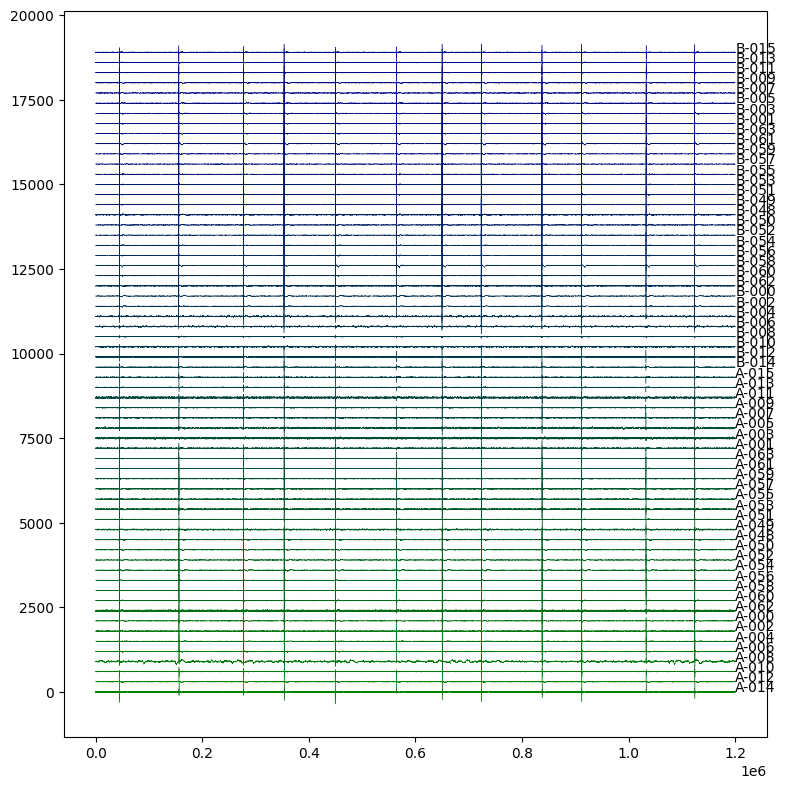

In [22]:
# Extract stored data
traces = trace_data['traces']
sampling_frequency = trace_data['sampling_frequency']
active_channel_names = trace_data['active_channel_names']

print(f"Loaded {traces.shape[0]} traces with {traces.shape[1]} time points each.")

from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(8, 8))

colors = ['green', 'darkblue']
cmap = LinearSegmentedColormap.from_list('blue_gradient', colors, N=64)

gap = 300

for trace_index, trace in enumerate(traces):
    plt.plot(trace + trace_index * gap, color=cmap(trace_index), linewidth=0.3)
    plt.text(len(trace), trace_index * gap, active_channel_names[trace_index])

plt.tight_layout()
plt.show()

# Waveforms

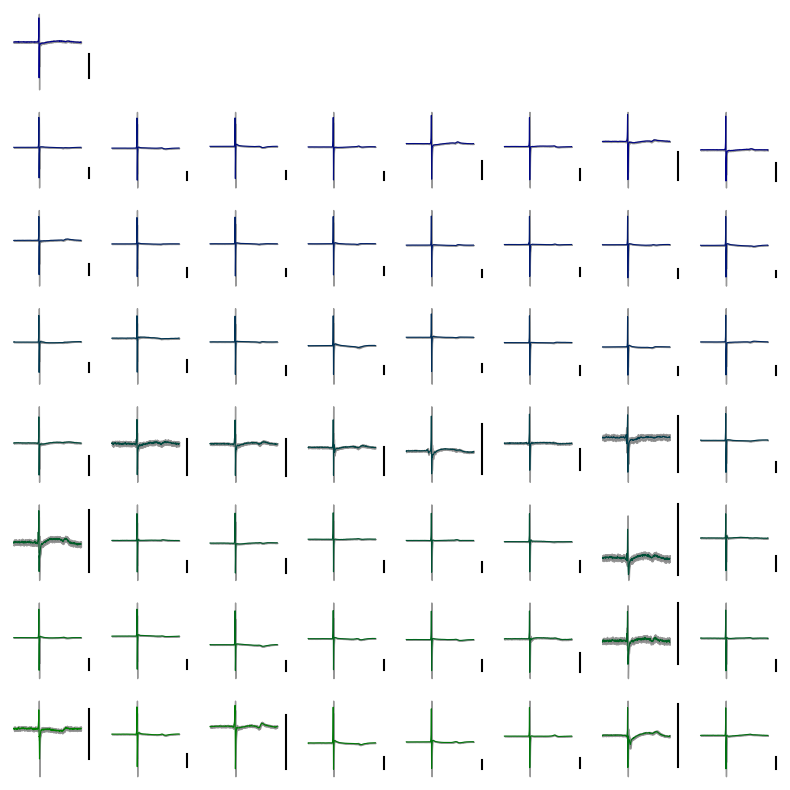

In [ ]:
mean_waveforms = waveform_data["mean_waveforms"]
std_waveforms = waveform_data["std_waveforms"]
channel_indices = waveform_data["channel_indices"]

a, b = 8, 8  

colors = ['green', 'darkblue']
cmap = LinearSegmentedColormap.from_list('blue_gradient', colors, N=len(channel_indices))

fig = plt.figure(figsize=(8, 8))

for i, ch in enumerate(channel_indices):
    row = i // b
    col = i % b
    inverted_c = (a - 1 - row) * b + (col + 1) 

    plt.subplot(a, b, inverted_c)
    plt.plot(mean_waveforms[i], color=cmap(i), linewidth=0.8)
    plt.fill_between(np.arange(len(mean_waveforms[i])), 
                     mean_waveforms[i] - std_waveforms[i], 
                     mean_waveforms[i] + std_waveforms[i], 
                     color='gray', alpha=0.8)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.set_xticks([])
    ax.set_yticks([])

    scale_y = [np.min(mean_waveforms[i]), np.min(mean_waveforms[i]) + 200] 
    scale_x = [18000, 18000] 
    ax.plot(scale_x, scale_y, 'k-', linewidth=1.5)

plt.tight_layout()
plt.show()


# Clustermap

In [ ]:
genes_ = ['MYH6','TNNI1','TNNT2','VCL','ACTC1', 'ACTN2', 'MYH7','TNNI3','VIM','FHL1','LBH', 'CDH2', 
          'CACNA1C','KCNQ1','KCNA5','KCNK3','RYR2','SLC8A1','VDAC2','VDAC3', 'ATOX1', 'ATP1A1',
          'SLC16A1','SLC2A1','COX8A','ATP2A2','ALDH1A2','SLC44A2', 
          'HOPX','SMPX','PRRX1','GATA4', 'KCNE2','GJA1', 'GJA5','ITGA5', 
          'COL3A1','COL1A2','COL8A1', 
          'WNT2','SLIT2',  
          'POSTN','KDR', 
          ]

genes_in_data = [gene for gene in genes_ if gene in ad_gene.var_names]

ad_selected_genes = ad_gene[:, genes_in_data]


In [5]:
marker_data = ad_selected_genes.X
marker_data_ephy = pd.DataFrame(ad_ephy.X, index=ad_ephy.obs.index)
marker_data_cell_comp = pd.DataFrame({
    'cardiomyocyte': ad_gene.obs['cardiomyocyte'].values,
    'fibroblast': ad_gene.obs['fibroblast'].values
}, index=ad_gene.obs.index)

In [6]:
ephy_T = marker_data_ephy.T
gene_T = marker_data.T
cell_comp_T = marker_data_cell_comp.T

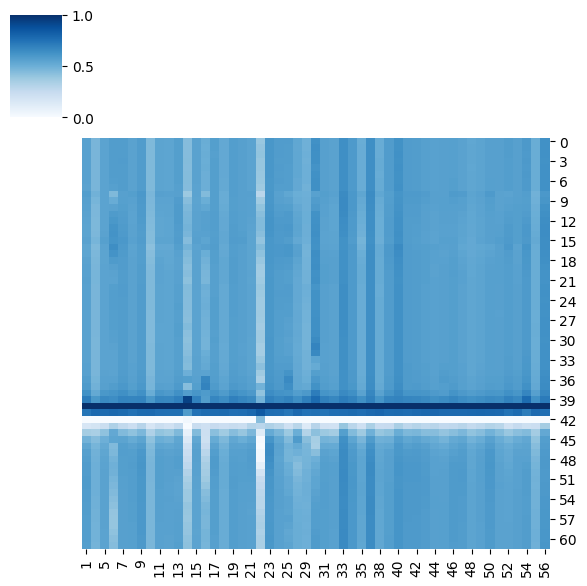

In [7]:
# Create the clustermap
g = sns.clustermap(ephy_T, 
                   metric="euclidean", 
                   method="average", 
                   cmap="Blues", 
                   row_cluster=False,  
                   col_cluster=False,  
                   standard_scale=1,  
                   dendrogram_ratio = (0.1, 0.2),
                   figsize=(6, 6)) 

plt.tight_layout()
plt.show()

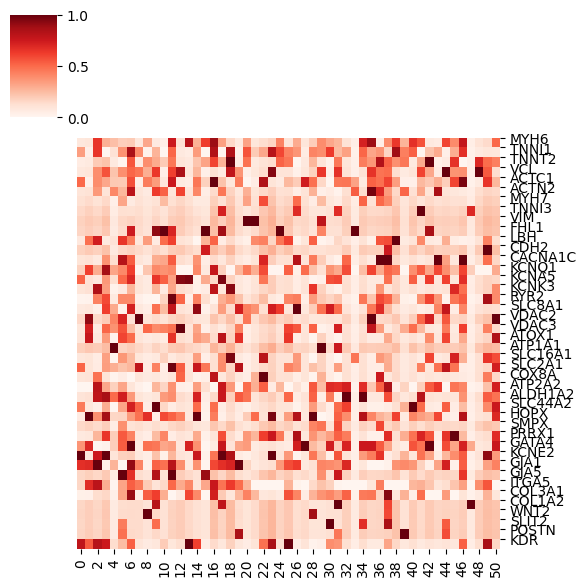

In [8]:
# Create the clustermap
g = sns.clustermap(gene_T, 
                   metric="euclidean", 
                   method="average", 
                   cmap="Reds", 
                   row_cluster=False,  
                   col_cluster=False,  
                   standard_scale=1,  
                   dendrogram_ratio = (0.1, 0.2),
                   figsize=(6, 6)) 

g.ax_heatmap.set_yticks(range(len(genes_in_data)))  
g.ax_heatmap.set_yticklabels(genes_in_data, rotation=0)  

plt.tight_layout()
plt.show()

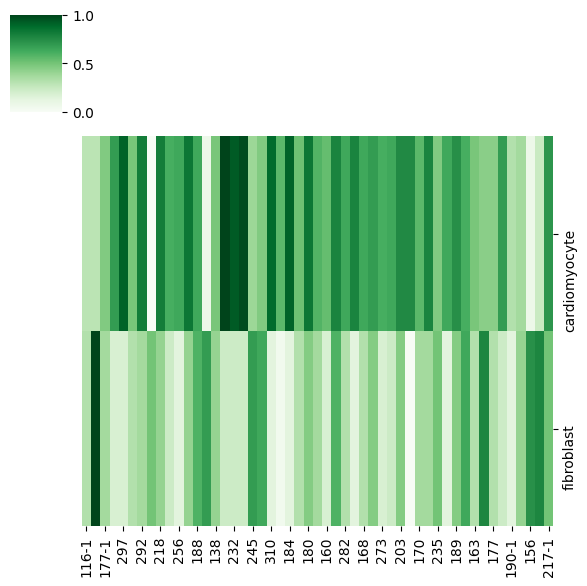

In [9]:
# Create the clustermap
g = sns.clustermap(cell_comp_T, 
                   metric="euclidean", 
                   method="average", 
                   cmap="Greens", 
                   row_cluster=False,  
                   col_cluster=False,  
                   standard_scale=False,
                   dendrogram_ratio = (0.1, 0.2),
                   figsize=(6, 6)) 

plt.tight_layout()
plt.show()